In [215]:
import torch
import json
import os
import matplotlib.pyplot as plt


# Data Extraction

The goal of this notebook is to extract the data from our experiments and produce graphs to put into our report.

In [220]:
base_path = "/content/drive/MyDrive/McGill/COMP551/comp551-mini4/"

path_MLP_lin = base_path + "MLP/runs_Lin"
path_MLP_relu = base_path + "MLP/runs_ReLU"
path_MLP_fashion = base_path + "MLP/runs_Fashion_ReLU"

path_resnet_cifar10 = base_path + "ResNet18/runs_cifar10"
path_resnet_cifar100 = base_path + "ResNet18/runs_cifar100"
path_resnet_svhn = base_path + "ResNet18/runs_svhn"
path_resnet_mnist = base_path + "ResNet18/runs_mnist"

print(path_MLP_lin)

/content/drive/MyDrive/McGill/COMP551/comp551-mini4/MLP/runs_Lin


## Helper Functions

In [217]:
def extract_base_width(file_name):
  """
  This function will extract the base and width from a file name.

  It assumes that the second and third number present (in isolation between 
  underscore) in the specific model data path represent the base width of 
  the model and the new width.
  """
  data = [int(dig) for dig in file_name.split("_") if dig.isdigit()]
  return data[0], data[1]

In [301]:
def stats_to_json(folder_path, key_value, last_epoch, extension, use_last=False):
  """
  This method will extract all data from a folder into a specified json format.

  It assumes that the second and third number present in the specific model data
  path represent the base width of the model and the new width.

  Those 2 values can be used to calculate the connectivity of this model.
  """
  return_json = {}
  for file in os.listdir(folder_path):
    with open(folder_path + "/" + file + "/stats" + extension, "rb") as fp:
      data = torch.load(fp)
      try:
        acc = data[key_value][last_epoch]['test']
      except KeyError:
        if use_last:
          acc = data[key_value][list(data[key_value])[-1]]["test"]
        else:
          print("File: " + file + " experiment did not finish training")
          continue
      base, width = extract_base_width(file)

      if base in return_json.keys():
        return_json[base][width] = acc
      else:
        return_json[base] = {}
        return_json[base][width] = acc
  
  return return_json



In [238]:
def pretty_print(dict_json):
  print(json.dumps(dict_json, indent=4))

## MLP Data Extraction



### Original MNIST

In [250]:
lin_data = stats_to_json(path_MLP_lin, "acc", 299, ".pth")

In [251]:
relu_data = stats_to_json(path_MLP_relu, "acc", 299, ".pth")

In [332]:
ax1_xaxis = [int(x/5) for x in list(lin_data[5].keys())]
ax1_yaxis = list(lin_data[5].values())


dense_data_lin = lin_data.copy()
dense_data_lin.pop(5)
ax1_xaxis_dense = [int(x/5) for x in dense_data_lin.keys()]
ax1_yaxis_dense = [list(x.values())[0] for x in list(dense_data_lin.values())]


ax2_xaxis = [float(x/5) for x in list(relu_data[5].keys())]
ax2_yaxis = list(relu_data[5].values())


dense_data_relu = relu_data.copy()
dense_data_relu.pop(5)
ax2_xaxis_dense = [float(x/5) for x in dense_data_relu.keys()]
ax2_yaxis_dense = [list(x.values())[0] for x in list(dense_data_relu.values())]


In [229]:
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = .8      # the top of the subplots of the figure
wspace = .5   # the amount of width reserved for blank space between subplots
hspace = 2.5   # the amount of height reserved for white space between subplots



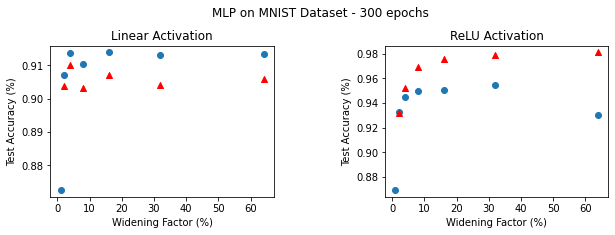

In [394]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
fig.subplots_adjust(left, bottom, right, top, wspace, hspace)

ax1.scatter(ax1_xaxis, ax1_yaxis)
ax1.scatter(ax1_xaxis_dense, ax1_yaxis_dense, color='red', marker='^')
ax1.set_title("Linear Activation")
ax1.set(xlabel='Widening Factor (%)', ylabel='Test Accuracy (%)')

ax2.scatter(ax2_xaxis, ax2_yaxis)
ax2.scatter(ax2_xaxis_dense, ax2_yaxis_dense, color='red', marker='^')
ax2.set_title("ReLU Activation")
ax2.set(xlabel='Widening Factor (%)', ylabel='Test Accuracy (%)')

plt.suptitle('MLP on MNIST Dataset - 300 epochs')
plt.show()

### Fashion MNIST

In [252]:
fashion_data = stats_to_json(path_MLP_fashion, "acc", 49, ".pth")

In [232]:
xaxis = [int(x/5) for x in list(fashion_data[5].keys())]
yaxis = list(fashion_data[5].values())


dense_data_fashion = fashion_data.copy()
dense_data_fashion.pop(5)
xaxis_dense = [int(x/5) for x in dense_data_fashion.keys()]
yaxis_dense = [list(x.values())[0] for x in list(dense_data_fashion.values())]

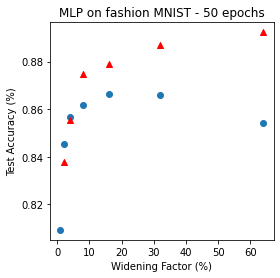

In [233]:
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(4)


plt.scatter(xaxis, yaxis)
plt.scatter(xaxis_dense, yaxis_dense, color='red', marker='^')
plt.title("MLP on fashion MNIST - 50 epochs")
plt.xlabel('Widening Factor (%)')
plt.ylabel('Test Accuracy (%)')

plt.show()

## ResNet Extraction

### Results Reproduction


In [314]:
cifar10_data = stats_to_json(path_resnet_cifar10, "acc1", 49, ".pt")
cifar100_data = stats_to_json(path_resnet_cifar100, "acc1", 49, ".pt")
svhn_data = stats_to_json(path_resnet_svhn, "acc1", 49, ".pt")

File: cifar100_resnet18_12_120_mbs_128_lr_0.1_seed_888 experiment did not finish training
File: svhn_resnet18_8_40_mbs_128_lr_0.1_seed_888 experiment did not finish training
File: svhn_resnet18_12_90_mbs_128_lr_0.1_seed_888 experiment did not finish training


In [315]:
# Add Aaron's Cifar100 data
# It is stored in JSON format in GitRepo and contains:

aaron_cifar100_data_12 = {
    12: 41.82,
    18: 46.23,
    26: 45.44
}
cifar100_data[12] = {**cifar100_data[12], **aaron_cifar10_data_12}



In [316]:
pretty_print(cifar10_data)

{
    "8": {
        "12": 80.02,
        "26": 78.82,
        "17": 76.17,
        "60": 81.15,
        "40": 79.43,
        "8": 76.9
    },
    "12": {
        "90": 81.87,
        "39": 83.17,
        "12": 79.12,
        "26": 81.11,
        "18": 74.92,
        "60": 79.19
    }
}


In [317]:
pretty_print(cifar100_data)

{
    "8": {
        "8": 41.53,
        "17": 45.06,
        "26": 44.32,
        "12": 46.91,
        "60": 47.57,
        "40": 48.24,
        "80": 46.67
    },
    "12": {
        "90": 44.58,
        "60": 49.79,
        "39": 51.58,
        "12": 41.82,
        "18": 46.23,
        "26": 45.44
    }
}


In [318]:
pretty_print(svhn_data)

{
    "8": {
        "8": 86.35525507068223,
        "12": 88.2721266133989,
        "26": 88.64090350338046,
        "17": 89.40918869084204
    },
    "12": {
        "12": 90.28503380454825,
        "39": 90.69606637984019,
        "60": 91.24539028887523,
        "18": 90.90350338045482,
        "26": 90.34649661954518
    }
}


In [391]:
def graph(ax, dict_json):

  lines = {1: ['red', '*'], 2: ["green", "o"]}
  index = 1
  for width in dict_json.keys():
    xaxis = [float(x/width) for x in list(dict_json[width].keys())]
    yaxis = list(dict_json[width].values())

    ax.scatter(xaxis, yaxis, color=lines[index][0], marker=lines[index][1])
    index += 1
  ax.legend(dict_json.keys(), loc=4)
  return ax

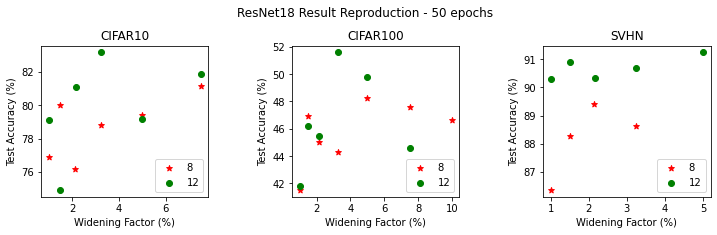

In [395]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3))
fig.subplots_adjust(left, bottom, right, top, wspace, hspace)

xaxis="Widening Factor (%)"
yaxis="Test Accuracy (%)"

ax1 = graph(ax1, cifar10_data)
ax1.set_title("CIFAR10")
ax1.set(xlabel=xaxis, ylabel=yaxis)

ax2 = graph(ax2, cifar100_data)
ax2.set_title("CIFAR100")
ax2.set(xlabel=xaxis, ylabel=yaxis)

ax3 = graph(ax3, svhn_data)
ax3.set_title("SVHN")
ax3.set(xlabel=xaxis, ylabel=yaxis)

plt.suptitle('ResNet18 Result Reproduction - 50 epochs')
plt.show()

### Hyperparameter Sensitivity

### New Dataset

In [339]:
mnist_data = stats_to_json(path_resnet_mnist, "acc1", 49, ".pt", True)

In [340]:
pretty_print(mnist_data)

{
    "12": {
        "12": 98.69,
        "18": 98.38,
        "26": 99.22
    }
}


[Text(0, 0.5, 'Test Accuracy (%)'), Text(0.5, 0, 'Widening Factor (%)')]

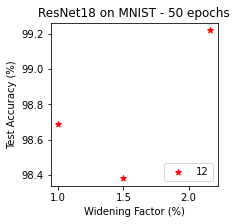

In [393]:
fig, (ax1) = plt.subplots(1, 1, figsize=(3,3))

xaxis="Widening Factor (%)"
yaxis="Test Accuracy (%)"

ax1 = graph(ax1, mnist_data)
ax1.set_title("ResNet18 on MNIST - 50 epochs")
ax1.set(xlabel=xaxis, ylabel=yaxis)